In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import math

In [2]:
df = pd.read_csv('prepared_data/back_2_seconds_normalized.csv')
df

,Unnamed: 0,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...","[[0.5670499801635742, -0.09542500227689743, 0....","[[-129.78750610351562, 333.7125244140625, 301....",2
1,1,CLIMBING,"[[-0.3169500231742859, 1.4239500761032104, 12....","[[0.1942874938249588, -0.2116124927997589, 0.2...","[[39.84375, 63.95625305175781, 10.612500190734...",2
2,2,CLIMBING,"[[0.3540000021457672, 3.427950143814087, 9.400...","[[-0.9094250202178955, -2.147200107574463, -0....","[[32.94375228881836, -27.243751525878906, -55....",2
3,3,CLIMBING,"[[0.2350500077009201, 3.6130502223968506, 8.53...","[[-1.0491249561309814, 0.3264249861240387, 1.9...","[[13.443750381469727, -7.256250381469727, -31....",2
4,4,CLIMBING,"[[2.2360501289367676, -0.8350500464439392, 9.6...","[[-0.1732500046491623, -0.47795000672340393, -...","[[11.456250190734863, 15.112500190734863, -73....",2
...,...,...,...,...,...,...
207,207,DOWNTIME,"[[-5.512950420379639, 7.783050537109375, 1.072...","[[-0.013749999925494194, 0.04193750023841858, ...","[[32.70000076293945, -36.65625, 10.08750057220...",2
208,208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...","[[0.011824999935925007, 0.0013749999925494194,...","[[32.88750076293945, -36.1875, 11.34375], [33....",2
209,209,DOWNTIME,"[[-5.656050205230713, 7.7470502853393555, 0.90...","[[0.00013749999925494194, 0.037675000727176666...","[[32.88750076293945, -36.54375076293945, 11.34...",2
210,210,DOWNTIME,"[[-5.664000034332275, 7.711050510406494, 0.691...","[[-0.006874999962747097, 0.011137500405311584,...","[[32.94375228881836, -36.35625076293945, 12.41...",2


In [3]:
# Convert string to list of list of floats
df['Accelerometer'] = df['Accelerometer'].apply(eval)
df['Gyroscope'] = df['Gyroscope'].apply(eval)
df['Magnetometer'] = df['Magnetometer'].apply(eval)

In [4]:
df_len = df
df_len['Accelerometer'] = df_len['Accelerometer'].apply(len)
df_len['Gyroscope'] = df_len['Gyroscope'].apply(len)
df_len['Magnetometer'] = df_len['Magnetometer'].apply(len)
df_len

,Unnamed: 0,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,0,CLIMBING,92,73,7,2
1,1,CLIMBING,100,100,10,2
2,2,CLIMBING,100,100,10,2
3,3,CLIMBING,100,100,10,2
4,4,CLIMBING,100,100,10,2
...,...,...,...,...,...,...
207,207,DOWNTIME,100,100,10,2
208,208,DOWNTIME,100,100,10,2
209,209,DOWNTIME,100,100,10,2
210,210,DOWNTIME,100,100,10,2


In [5]:
df_len.to_csv('prepared_data/back_2_seconds_normalized_lengths.csv')

In [33]:
labels = ["CLIMBING","FALLING","DOWNTIME","WALKING"]

data = {
    "Category": labels,
    "Accelerometer": [0 for _ in range(4)],
    "Gyroscope": [0 for _ in range(4)],
    "Magnetometer": [0 for _ in range(4)],
    "Duration": [0] * 4
}

new_df = pd.DataFrame(data)

print(new_df)
# Iterowanie po wierszach oryginalnego DataFrame
for i, row in df.iterrows():
    label = row["Category"]
    index = labels.index(row["Category"])

    new_df.at[index, "Accelerometer"] += row["Accelerometer"]
    new_df.at[index, "Gyroscope"]+=row["Gyroscope"]
    new_df.at[index, "Magnetometer"]+=row["Magnetometer"]
    new_df.loc[index, "Duration"] += row["Duration"]


new_df

   Category  Accelerometer  Gyroscope  Magnetometer  Duration
0  CLIMBING              0          0             0         0
1   FALLING              0          0             0         0
2  DOWNTIME              0          0             0         0
3   WALKING              0          0             0         0


,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,CLIMBING,5262,5243,524,106
1,FALLING,5185,5185,511,106
2,DOWNTIME,5265,5265,526,106
3,WALKING,5119,5119,512,106


In [17]:
len(new_df["Magnetometer"][3])

1015

In [27]:
def plot_xyz(accelerometer_data, gyroscope_data, magnetometer_data,duration,plot_title):
    # Rozpakowanie danych XYZ dla akcelerometru
    accel_x = [item[0] for item in accelerometer_data]
    accel_y = [item[1] for item in accelerometer_data]
    accel_z = [item[2] for item in accelerometer_data]

    # Rozpakowanie danych XYZ dla żyroskopu
    gyro_x = [item[0] for item in gyroscope_data]
    gyro_y = [item[1] for item in gyroscope_data]
    gyro_z = [item[2] for item in gyroscope_data]

    # Rozpakowanie danych XYZ dla magnetometru
    mag_x = [item[0] for item in magnetometer_data]
    mag_y = [item[1] for item in magnetometer_data]
    mag_z = [item[2] for item in magnetometer_data]

    # Tworzenie subplots z 1 wierszem i 3 kolumnami
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Tworzenie osi czasu
    time = np.linspace(0, duration, len(accel_x))

    # Tworzenie wykresu dla parametru Accelerometer
    axs[0].plot(time,accel_x, color='red', label='X')
    axs[0].plot(time,accel_y, color='green', label='Y')
    axs[0].plot(time,accel_z, color='blue', label='Z')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Value')
    axs[0].set_title('Accelerometer')
    axs[0].legend()

    # Tworzenie osi czasu
    time = np.linspace(0, duration, len(gyro_x))

    # Tworzenie wykresu dla parametru Gyroscope
    axs[1].plot(time,gyro_x, color='red', label='X')
    axs[1].plot(time,gyro_y, color='green', label='Y')
    axs[1].plot(time,gyro_z, color='blue', label='Z')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Gyroscope')
    axs[1].legend()

    # Tworzenie osi czasu
    time = np.linspace(0, duration, len(mag_x))

    # Tworzenie wykresu dla parametru Magnetometer
    axs[2].plot(time,mag_x, color='red', label='X')
    axs[2].plot(time,mag_y, color='green', label='Y')
    axs[2].plot(time,mag_z, color='blue', label='Z')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Value')
    axs[2].set_title('Magnetometer')
    axs[2].legend()


    # Ustawienie odpowiednich limitów na osi X
    for ax in axs:
        ax.set_xlim(0, duration)

    fig.suptitle(plot_title)

    # Dostosowanie układu subplots
    plt.tight_layout()

    # Wyświetlenie wykresów
    plt.show()

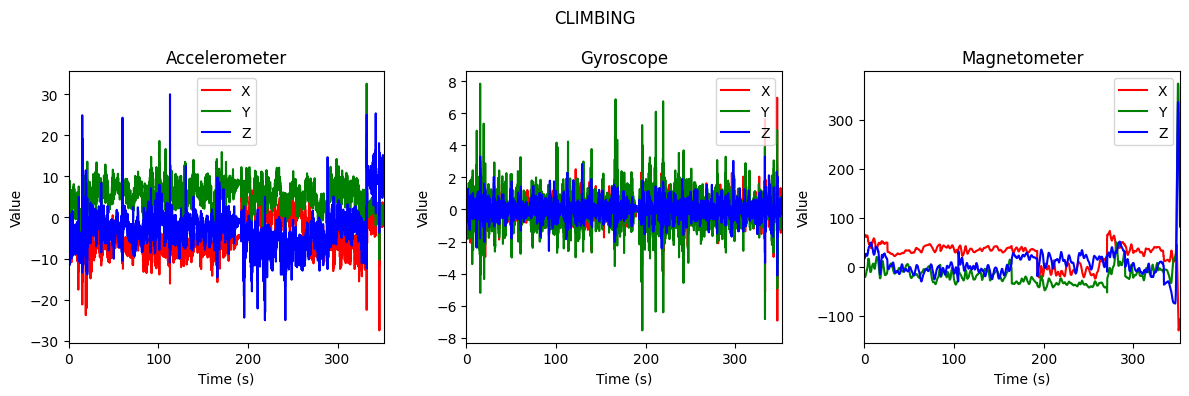

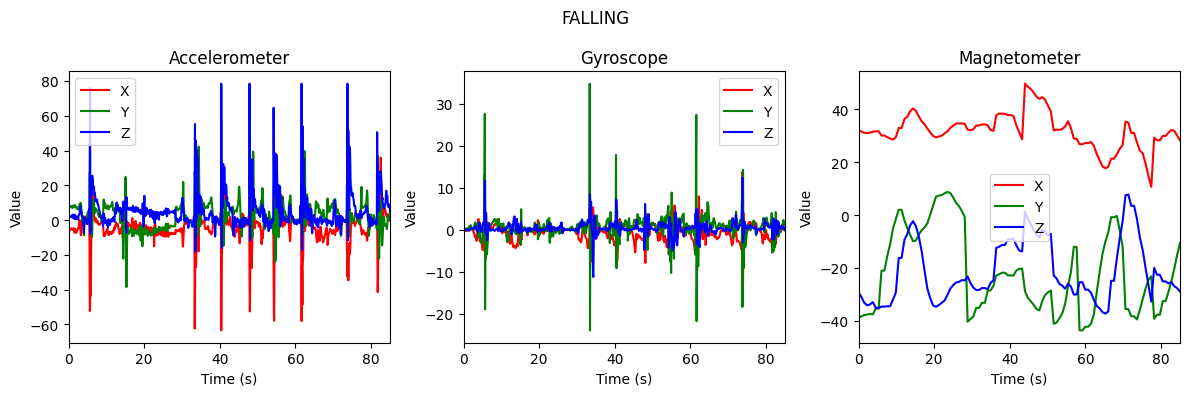

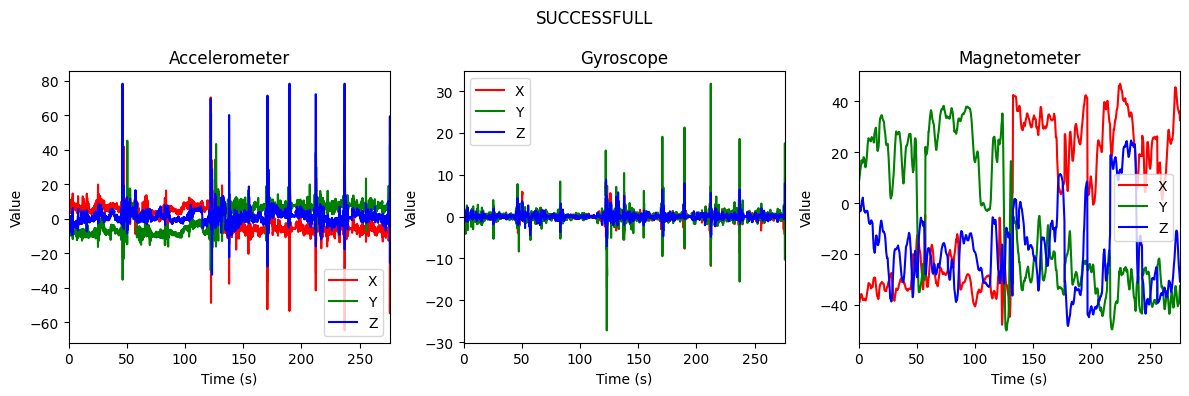

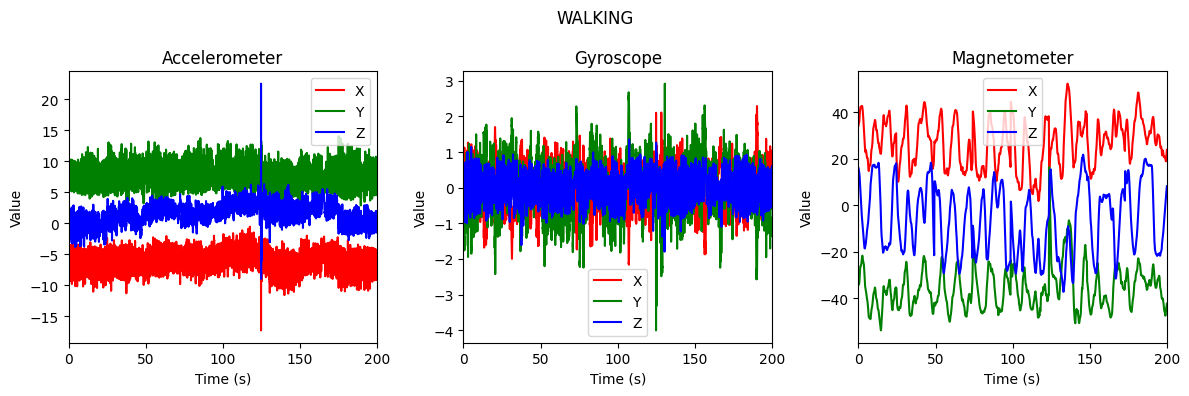

In [28]:
# Iterowanie po wierszach oryginalnego DataFrame
for _, row in new_df.iterrows():
    plot_xyz(row["Accelerometer"],row["Gyroscope"],row["Magnetometer"],row["Duration"],row["Category"])

In [29]:
def calculate_sensor_stats(accelerometer_data, gyroscope_data, magnetometer_data, threshold, scenario):
    # Obliczenie długości list akcelerometru, żyroskopu i magnetometru
    accel_lengths = len(accelerometer_data)
    gyro_lengths = len(gyroscope_data)
    magnet_lengths = len(magnetometer_data)

    # Obliczenie średnich wartości dla X, Y, Z
    accel_means = np.mean(accelerometer_data, axis=0)
    gyro_means = np.mean(gyroscope_data, axis=0)
    magnet_means = np.mean(magnetometer_data, axis=0)

    # Obliczenie odchyleń standardowych dla X, Y, Z
    accel_std = np.std(accelerometer_data, axis=0)
    gyro_std = np.std(gyroscope_data, axis=0)
    magnet_std = np.std(magnetometer_data, axis=0)

    # Obliczenie odchyleń dla każdej z wartości XYZ na podstawie procentowego thresholdu
    accel_deviations = np.abs(accelerometer_data - np.abs(accel_means)) / np.abs(accel_means) * 100
    gyro_deviations = np.abs(gyroscope_data - np.abs(gyro_means)) / np.abs(gyro_means) * 100
    magnet_deviations = np.abs(magnetometer_data - np.abs(magnet_means)) / np.abs(magnet_means) * 100

    devation_x = [accel_deviations[:, 0], gyro_deviations[:, 0], magnet_deviations[:, 0]]
    devation_y = [accel_deviations[:, 1], gyro_deviations[:, 1], magnet_deviations[:, 1]]
    devation_z = [accel_deviations[:, 2], gyro_deviations[:, 2], magnet_deviations[:, 2]]

    above_x = []
    above_y = []
    above_z = []

    for i, dev in enumerate(devation_x):
        above_x.append(len(dev[dev > threshold]))

    for i, dev in enumerate(devation_y):
        above_y.append(len(dev[dev > threshold]))

    for i, dev in enumerate(devation_z):
        above_z.append(len(dev[dev > threshold]))

    # Tworzenie DataFrame z obliczonymi wartościami
    data = {
        "Scenario": [" ", scenario, " "],
        "Sensor": ["Accelerometer", "Gyroscope", "Magnetometer"],
        "Length": [accel_lengths, gyro_lengths, magnet_lengths],
        "Mean_X": [accel_means[0], gyro_means[0], magnet_means[0]],
        "Mean_Y": [accel_means[1], gyro_means[1], magnet_means[1]],
        "Mean_Z": [accel_means[2], gyro_means[2], magnet_means[2]],
        "Std_X": [accel_std[0], gyro_std[0], magnet_std[0]],
        "Std_Y": [accel_std[1], gyro_std[1], magnet_std[1]],
        "Std_Z": [accel_std[2], gyro_std[2], magnet_std[2]],
        "Threshold (%)": [threshold, threshold, threshold],
        "X > Threshold": above_x,
        "Y > Threshold": above_y,
        "Z > Threshold": above_z
    }

    df = pd.DataFrame(data)

    return df

In [33]:
stats_list = []

for _, row in new_df.iterrows():
    stats = calculate_sensor_stats(row["Accelerometer"], row["Gyroscope"], row["Magnetometer"], 200, row["Category"])
    stats_list.extend([stats.iloc[0],stats.iloc[1],stats.iloc[2]])
    stats_list.append(pd.Series([' ', ' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], index=stats.columns, dtype='object'))

df_stats = pd.DataFrame(stats_list)
df_stats.reset_index(drop=True, inplace=True)
df_stats

,Scenario,Sensor,Length,Mean_X,Mean_Y,Mean_Z,Std_X,Std_Y,Std_Z,Threshold (%),X > Threshold,Y > Threshold,Z > Threshold
0,,Accelerometer,13640,-4.534796,5.241654,-3.000191,3.979801,2.96954,4.495481,200,8571,41,7769
1,CLIMBING,Gyroscope,13621,0.004937,-0.009721,-0.001422,0.561054,0.851871,0.483407,200,13348,13193,13513
2,,Magnetometer,1360,25.782643,-14.139541,6.229729,23.484912,34.39516,31.839056,200,11,809,761
3,,,,,,,,,,,,,
4,,Accelerometer,1150,-4.304177,2.709384,4.825443,8.366197,8.251507,9.561288,200,542,472,135
5,FALLING,Gyroscope,1150,-0.707299,0.466546,0.409044,1.946371,2.921945,1.447991,200,513,514,316
6,,Magnetometer,113,31.913829,-21.815875,-21.334182,6.622653,15.623435,11.506429,200,0,65,71
7,,,,,,,,,,,,,
8,,Accelerometer,10429,-0.004592,0.936088,1.375529,6.590391,7.617868,4.273277,200,10426,10006,3455
9,SUCCESSFULL,Gyroscope,10430,-0.024721,0.06253,0.041739,0.719568,1.222167,0.688897,200,8999,7946,8131


In [ ]:
df_normalized = pd.read_csv('prepared_data/back_2_seconds_normalized.csv')
df_normalized

,Unnamed: 0,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...","[[0.5670499801635742, -0.09542500227689743, 0....","[[-129.78750610351562, 333.7125244140625, 301....",2
1,1,CLIMBING,"[[-0.3169500231742859, 1.4239500761032104, 12....","[[0.1942874938249588, -0.2116124927997589, 0.2...","[[39.84375, 63.95625305175781, 10.612500190734...",2
2,2,CLIMBING,"[[0.3540000021457672, 3.427950143814087, 9.400...","[[-0.9094250202178955, -2.147200107574463, -0....","[[32.94375228881836, -27.243751525878906, -55....",2
3,3,CLIMBING,"[[0.2350500077009201, 3.6130502223968506, 8.53...","[[-1.0491249561309814, 0.3264249861240387, 1.9...","[[13.443750381469727, -7.256250381469727, -31....",2
4,4,CLIMBING,"[[2.2360501289367676, -0.8350500464439392, 9.6...","[[-0.1732500046491623, -0.47795000672340393, -...","[[11.456250190734863, 15.112500190734863, -73....",2
...,...,...,...,...,...,...
207,207,DOWNTIME,"[[-5.512950420379639, 7.783050537109375, 1.072...","[[-0.013749999925494194, 0.04193750023841858, ...","[[32.70000076293945, -36.65625, 10.08750057220...",2
208,208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...","[[0.011824999935925007, 0.0013749999925494194,...","[[32.88750076293945, -36.1875, 11.34375], [33....",2
209,209,DOWNTIME,"[[-5.656050205230713, 7.7470502853393555, 0.90...","[[0.00013749999925494194, 0.037675000727176666...","[[32.88750076293945, -36.54375076293945, 11.34...",2
210,210,DOWNTIME,"[[-5.664000034332275, 7.711050510406494, 0.691...","[[-0.006874999962747097, 0.011137500405311584,...","[[32.94375228881836, -36.35625076293945, 12.41...",2


In [ ]:
# Convert string to list of list of floats
df_normalized['Accelerometer'] = df_normalized['Accelerometer'].apply(eval)
df_normalized['Gyroscope'] = df_normalized['Gyroscope'].apply(eval)
df_normalized['Magnetometer'] = df_normalized['Magnetometer'].apply(eval)

In [ ]:
labels_new = ["CLIMBING","FALLING","DOWNTIME","WALKING"]

data_new = {
    "Category": labels_new,
    "Accelerometer": [[] for _ in range(4)],
    "Gyroscope": [[] for _ in range(4)],
    "Magnetometer": [[] for _ in range(4)],
    "Duration": [0] * 4
}

new_df_normalized = pd.DataFrame(data_new)

print(new_df_normalized)
# Iterowanie po wierszach oryginalnego DataFrame
for i, row in df_normalized.iterrows():
    label = row["Category"]
    index = labels_new.index(row["Category"])

    new_df_normalized.at[index, "Accelerometer"].extend(row["Accelerometer"])
    new_df_normalized.at[index, "Gyroscope"].extend(row["Gyroscope"])
    new_df_normalized.at[index, "Magnetometer"].extend(row["Magnetometer"])
    new_df_normalized.loc[index, "Duration"] += row["Duration"]


new_df_normalized

   Category Accelerometer Gyroscope Magnetometer  Duration
0  CLIMBING            []        []           []         0
1   FALLING            []        []           []         0
2  DOWNTIME            []        []           []         0
3   WALKING            []        []           []         0


,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...","[[0.5670499801635742, -0.09542500227689743, 0....","[[-129.78750610351562, 333.7125244140625, 301....",106
1,FALLING,"[[-3.8299500942230225, 6.100050449371338, 3.93...","[[-0.02227500081062317, 0.10573749989271164, -...","[[30.712501525878906, -31.556251525878906, -24...",106
2,DOWNTIME,"[[-5.842950344085693, 7.117950439453125, 2.737...","[[-0.0013749999925494194, -0.02186249941587448...","[[35.70000076293945, -36.056251525878906, 3.0]...",106
3,WALKING,"[[-6.30495023727417, 5.659950256347656, 2.9689...","[[0.06984999775886536, -0.10999999940395355, 0...","[[27.48750114440918, -43.80000305175781, 4.256...",106


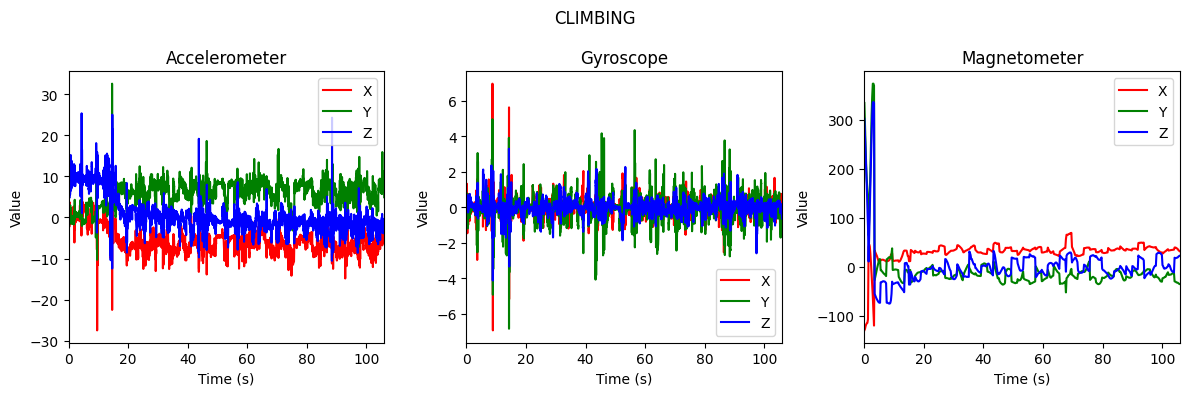

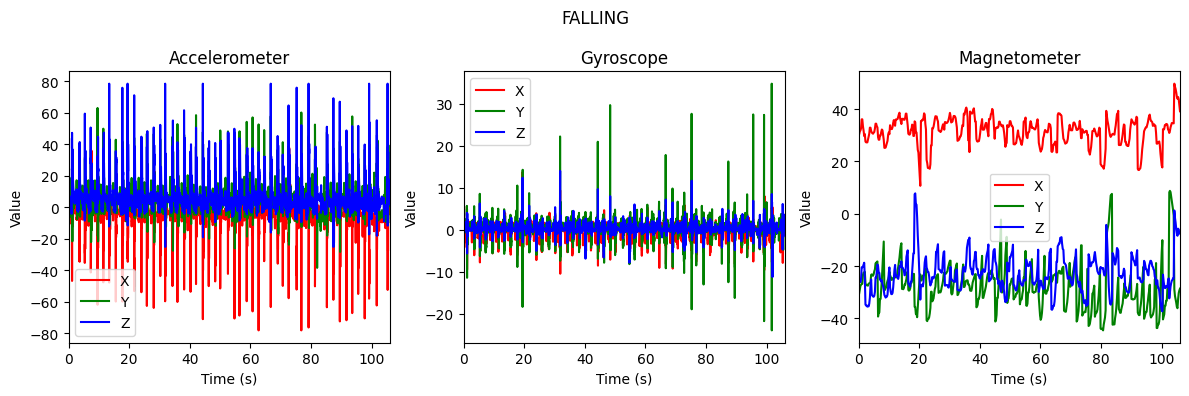

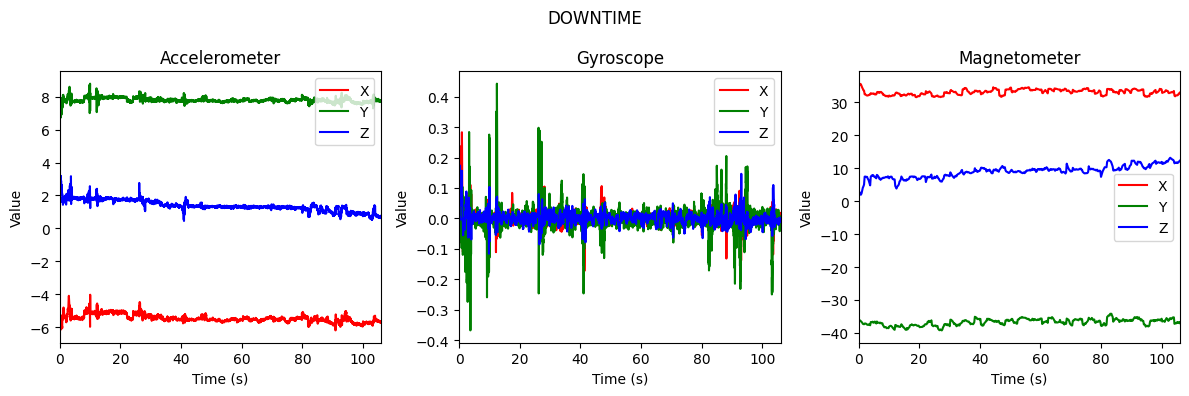

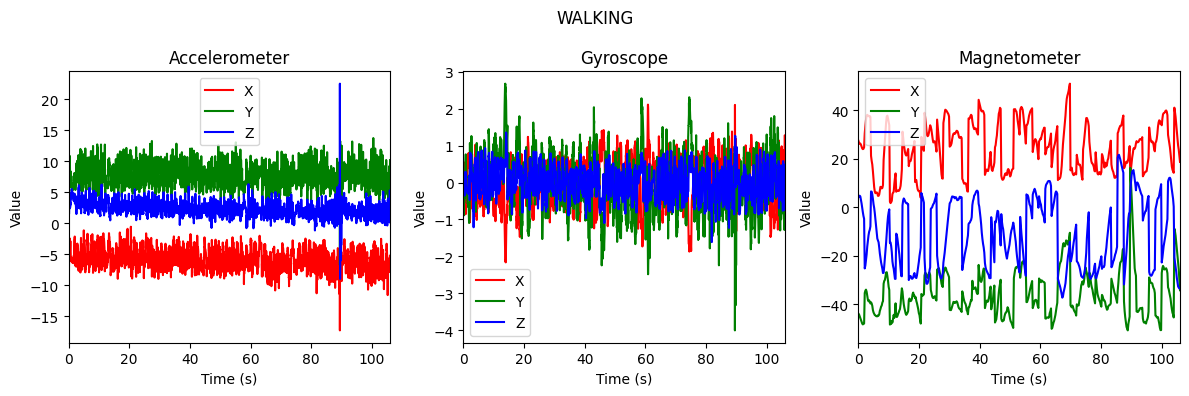

In [ ]:
# Iterowanie po wierszach oryginalnego DataFrame
for _, row in new_df_normalized.iterrows():
    plot_xyz(row["Accelerometer"],row["Gyroscope"],row["Magnetometer"],row["Duration"],row["Category"])

In [34]:
stats_list_new = []

for _, row in new_df_normalized.iterrows():
    stats = calculate_sensor_stats(row["Accelerometer"], row["Gyroscope"], row["Magnetometer"], 200, row["Category"])
    stats_list_new.extend([stats.iloc[0],stats.iloc[1],stats.iloc[2]])
    stats_list_new.append(pd.Series([' ', ' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], index=stats.columns, dtype='object'))

df_normalized_stats = pd.DataFrame(stats_list_new)
df_normalized_stats.reset_index(drop=True, inplace=True)
df_normalized_stats

,Scenario,Sensor,Length,Mean_X,Mean_Y,Mean_Z,Std_X,Std_Y,Std_Z,Threshold (%),X > Threshold,Y > Threshold,Z > Threshold
0,,Accelerometer,5262,-5.558838,5.773545,0.365416,3.012023,2.930203,4.376946,200,2917,7,4301
1,CLIMBING,Gyroscope,5243,-0.009066,-0.022258,-0.0191,0.563038,0.712765,0.462607,200,4978,4750,4589
2,,Magnetometer,524,29.580237,-7.475382,1.337762,22.09864,50.00894,46.565674,200,11,409,473
3,,,,,,,,,,,,,
4,,Accelerometer,5185,-4.304845,4.273538,6.066307,9.009356,8.608264,10.018402,200,1843,918,574
5,FALLING,Gyroscope,5185,-0.758941,0.503009,0.450225,1.651918,2.200562,1.119297,200,2415,2034,1241
6,,Magnetometer,511,31.658954,-27.689275,-22.833245,5.269397,9.030067,6.865377,200,0,264,279
7,,,,,,,,,,,,,
8,,Accelerometer,5265,-5.449078,7.790558,1.394235,0.232859,0.140911,0.344344,200,3162,0,0
9,DOWNTIME,Gyroscope,5265,0.002007,-0.000683,0.000879,0.028189,0.045812,0.02139,200,3950,4990,4784
